---

<div align="right"> Calculatoare și Tehnologia Informației, anul I </div>
<div align="right"> Caclul Numeric </div>
<div align="right"> 2024--2025 </div>


<div align="left">Spătaru Georgiana Valentina </div>




<div align="center" style="color:pink; font-size:32px; font-family:Comic Sans MS, cursive;">
    Rezolvarea numerică a ecuației de difuzie a căldurii
</div>





---
###  Model 1D: Difuzia căldurii pe intervalul [0,1]

Considerăm o bară metalică subțire (grosime neglijabilă), în echilibru termic, pe domeniul $[0,1]$. Se rezolvă ecuația staționară a difuziei căldurii:

$$
- u''(x) = f(x), \quad x \in [0, 1]
$$

unde $f(x) = -4 \sin(2x)$.

Se cunosc următoarele date:

1. **Stare de echilibru termic:**  
    Derivata lui $u$ în funcție de timp este zero $\left( \frac{\partial u}{\partial t} = 0 \right)$, deci considerăm o problemă staționară.


2. **Conductivitate constantă:**  
    $k(x) = 1$.


3. **Condiții la frontieră de tip Dirichlet:**  
    $$
    u(0) = 1, \quad u(1) = 2
    $$


4. **Discretizarea domeniului:**  
    Domeniul $[0,1]$ este discretizat uniform în $N+1$ noduri $x_i = i \cdot h$, unde $h = \frac{1}{N}$.  
    Graficul discretizării prezintă poziția nodurilor și numerotarea acestora.


    Se obține un **sistem liniar tridiagonal** de forma:

    $$
    T \cdot U = F
    $$

    Sistemul este rezolvat eficient prin **metoda Thomas** (metodă de complexitate $O(N)$).

    Rezultatul este reprezentat grafic, comparând soluția numerică cu soluția exactă (dacă este cunoscută), precum și eroarea absolută.



3. **Soluția exactă:**  

    $$ 
    u_{\text{exact}}(x) = - \sin(2*x) + 1 
    $$



---



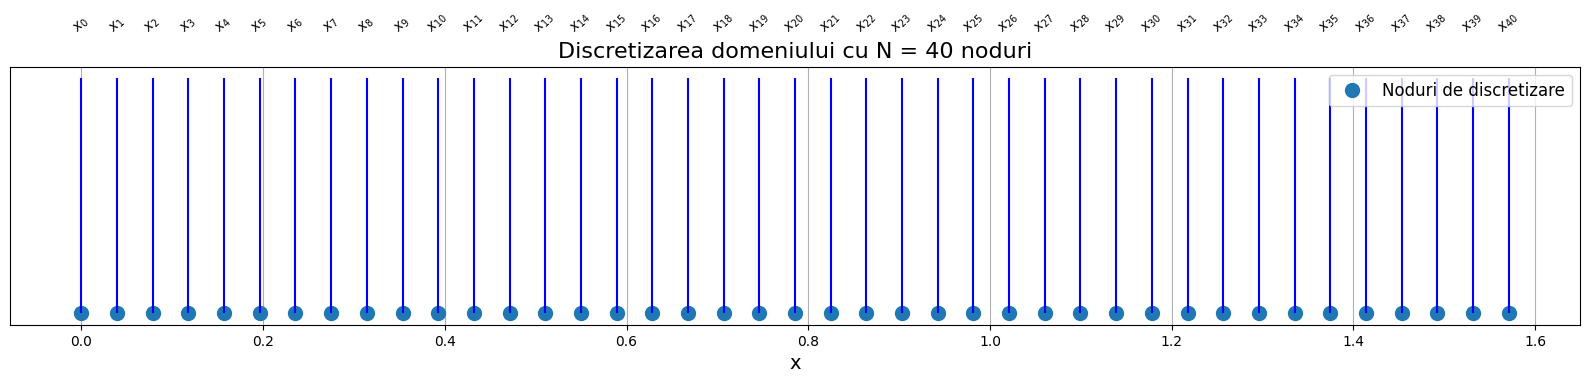

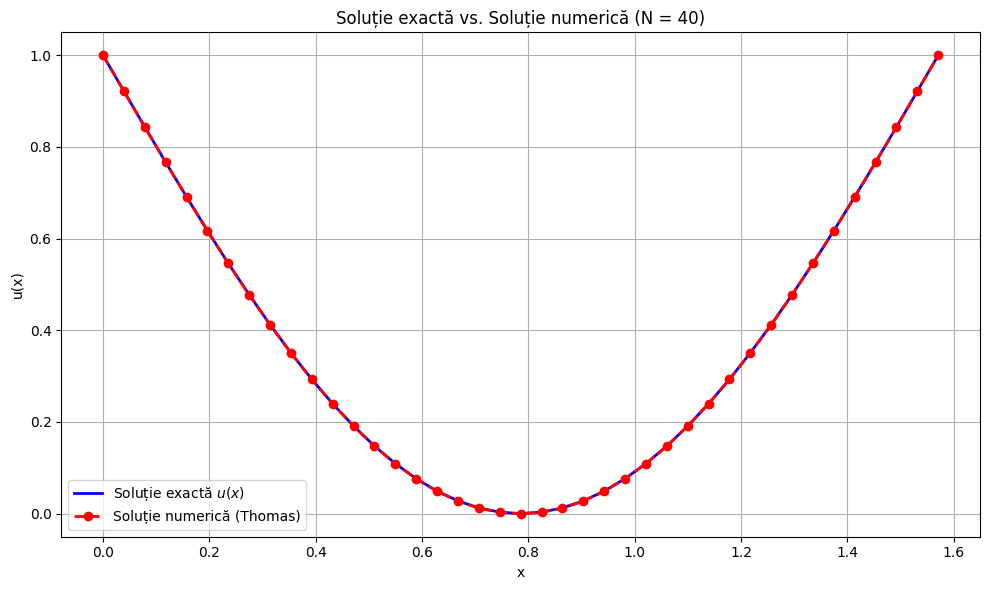

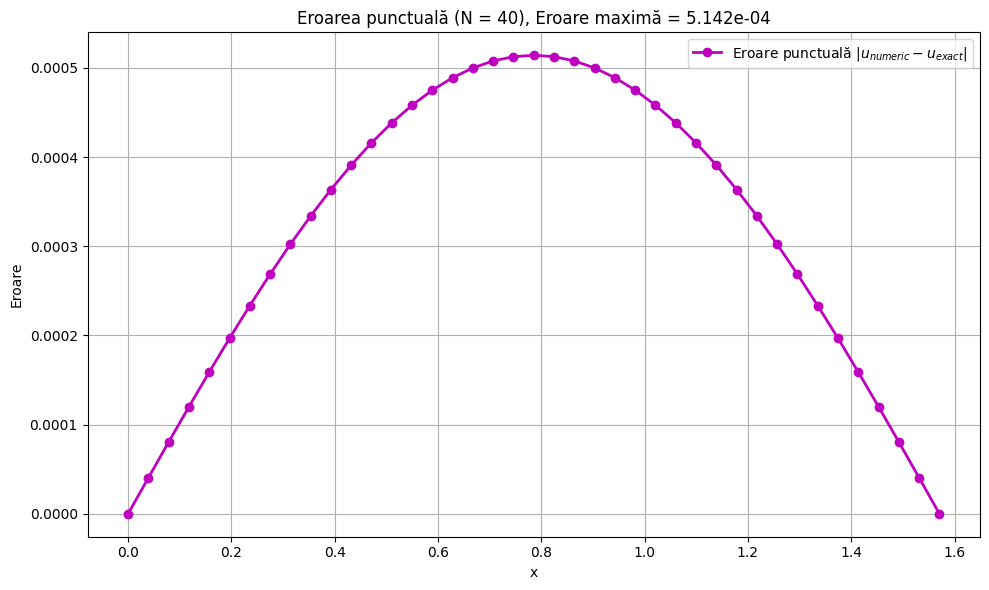

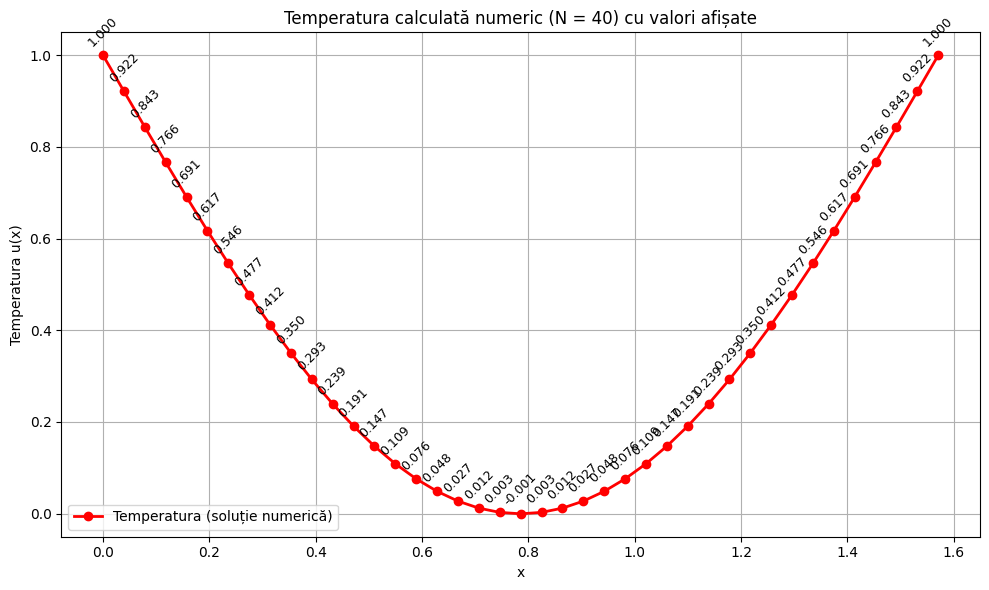

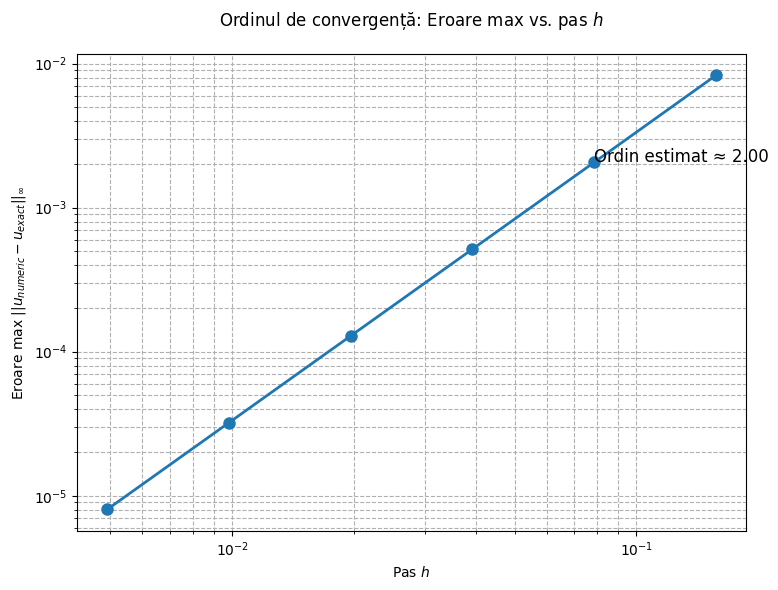

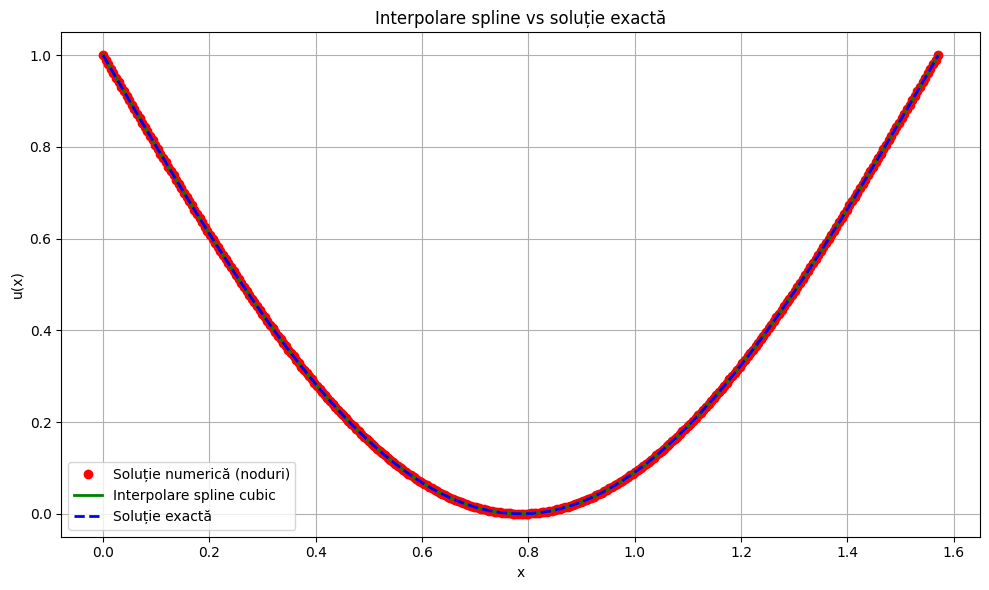

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#parametri generali
L = np.pi / 2
A = 1.0
B = 1.0

#definim sursa f(x)
def f(x):
    return -4 * np.sin(2 * x)

#soluția exactă
u_exact_func = lambda x: -np.sin(2 * x) + 1

#functia Thomas
def thomas(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        w = a[i - 1] / b[i - 1]
        b[i] -= w * c[i - 1]
        d[i] -= w * d[i - 1]
    u = np.zeros(n)
    u[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        u[i] = (d[i] - c[i] * u[i + 1]) / b[i]
    return u

#alegem discretizarea
N = 40
h = L / N
x = np.linspace(0, L, N + 1)

#construim sistemul pentru Thomas
a = -1.0 / h**2 * np.ones(N - 2)
b =  2.0 / h**2 * np.ones(N - 1)
c = -1.0 / h**2 * np.ones(N - 2)
d = np.zeros(N - 1)

for i in range(1, N):
    d[i - 1] = f(x[i])

d[0] += A / h**2
d[-1] += B / h**2

#rezolvare cu Thomas
U_interior = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# soluția completă
U = np.zeros(N + 1)
U[0] = A
U[1:N] = U_interior
U[N] = B

#soluția exactă
U_exact = u_exact_func(x)

#eroarea (absolută punctuală)
error = np.abs(U - U_exact)


#eroare maximă
error_max = np.max(error)



#varianta1 pt discretizare tabel
plt.figure(figsize=(16, 4)) 
plt.plot(x, np.zeros_like(x), 'o', markersize=10, label='Noduri de discretizare')
plt.vlines(x, 0, 0.1, color='blue')
for i, xi in enumerate(x):
    plt.text(xi, 0.12, f'$x_{{{i}}}$', ha='center', rotation=45, fontsize=10)

plt.xlabel('x', fontsize=14)
plt.yticks([])  # scoatem axa Y
plt.grid(axis='x')
plt.legend(fontsize=12)
plt.title(f'Discretizarea domeniului cu N = {N} noduri', fontsize=16)
plt.tight_layout()
plt.show()



#u_exact și u_calculat
plt.figure(figsize=(10, 6))
plt.plot(x, U_exact, '-', color='blue', linewidth=2, label='Soluție exactă $u(x)$')
plt.plot(x, U, 'o--', color='red', linewidth=2, label='Soluție numerică (Thomas)')
plt.title(f'Soluție exactă vs. Soluție numerică (N = {N})')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#eroarea punctuală
plt.figure(figsize=(10, 6))
plt.plot(x, error, 'm-o', linewidth=2, label='Eroare punctuală $|u_{numeric} - u_{exact}|$')
plt.title(f'Eroarea punctuală (N = {N}), Eroare maximă = {error_max:.3e}')
plt.xlabel('x')
plt.ylabel('Eroare')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#grafic temperatura numerică + valori afișate pe puncte
plt.figure(figsize=(10, 6))
plt.plot(x, U, 'ro-', linewidth=2, markersize=6, label='Temperatura (soluție numerică)')

# adăugăm text cu valoarea temperaturii la fiecare punct
for xi, ui in zip(x, U):
    plt.text(xi, ui + 0.02, f'{ui:.3f}', ha='center', fontsize=9, color='black', rotation=45)

plt.title(f'Temperatura calculată numeric (N = {N}) cu valori afișate')
plt.xlabel('x')
plt.ylabel('Temperatura u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#liste pentru h și eroare_max
h_values = []
error_max_values = []

#alegem valori de N din ce în ce mai mari
N_values = [10, 20, 40, 80, 160, 320]

for N in N_values:
    h = L / N
    x = np.linspace(0, L, N + 1)
    
    #construim sistemul
    a = -1.0 / h**2 * np.ones(N - 2)
    b =  2.0 / h**2 * np.ones(N - 1)
    c = -1.0 / h**2 * np.ones(N - 2)
    d = np.zeros(N - 1)
    
    for i in range(1, N):
        d[i - 1] = f(x[i])
    
    d[0] += A / h**2
    d[-1] += B / h**2
    
    #rezolvare Thomas
    U_interior = thomas(a.copy(), b.copy(), c.copy(), d.copy())
    
    #soluție completă
    U = np.zeros(N + 1)
    U[0] = A
    U[1:N] = U_interior
    U[N] = B
    
    #soluție exactă
    U_exact = u_exact_func(x)
    
    #eroare max
    error = np.abs(U - U_exact)
    error_max = np.max(error)
    
    #salvăm
    h_values.append(h)
    error_max_values.append(error_max)

#grafic log-log: ordinul de convergență
plt.figure(figsize=(8, 6))
plt.loglog(h_values, error_max_values, 'o-', linewidth=2, markersize=8)
plt.title("Ordinul de convergență: Eroare max vs. pas $h$", pad=20)
plt.xlabel("Pas $h$")
plt.ylabel(r"Eroare max $||u_{numeric} - u_{exact}||_{\infty}$")
plt.grid(True, which='both', linestyle='--')

#estimare panta (ordinul de convergență)
log_h = np.log(h_values)
log_err = np.log(error_max_values)
p = np.polyfit(log_h, log_err, 1)
plt.text(h_values[1], error_max_values[1], f"Ordin estimat ≈ {abs(p[0]):.2f}", fontsize=12)

plt.tight_layout()
plt.show()

from scipy.interpolate import interp1d

#creezi interpolarea:
interpolare = interp1d(x, U, kind='cubic')

#evaluezi pe puncte fine:
x_nou = np.linspace(0, L, 1000)
u_interp = interpolare(x_nou)
u_exact_nou = u_exact_func(x_nou)

#plot comparativ
plt.figure(figsize=(10,6))
plt.plot(x, U, 'ro', label='Soluție numerică (noduri)')
plt.plot(x_nou, u_interp, 'g-', linewidth=2, label='Interpolare spline cubic')
plt.plot(x_nou, u_exact_nou, 'b--', linewidth=2, label='Soluție exactă')

plt.title("Interpolare spline vs soluție exactă")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---

### Model 1D: k-variabil pe intervalul $[0, \pi/4]$

Se consideră ecuația diferențială de ordin 2:

$$
- \frac{d}{dx} \left( k(x) \frac{du}{dx} \right) = f(x), \quad x \in [0, L]
$$

unde:
- $k(x) = \cos^2(x)$
- $f(x) = -4 \sin(2x)$
- $L = \frac{\pi}{4}$

Se cunosc următoarele date:

1. **Condiții de frontieră de tip Dirichlet:**  
    $$
    u(0) = A = 1.0, \quad u(L) = B = 1.0
    $$

2. **Discretizarea domeniului:**  
    Rămâne la fel ca la modelul anterior.


3. **Soluția exactă:**  

    $$ 
    u_{\text{exact}}(x) = -4x + \pi \tan(x) + 1 
    $$


---

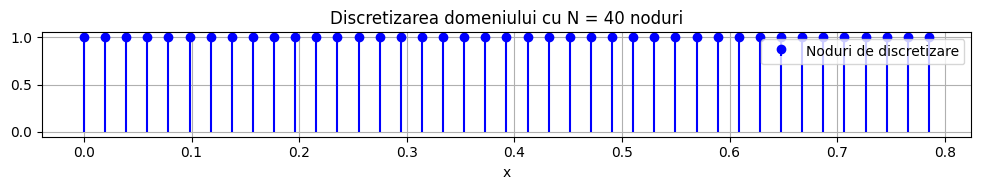

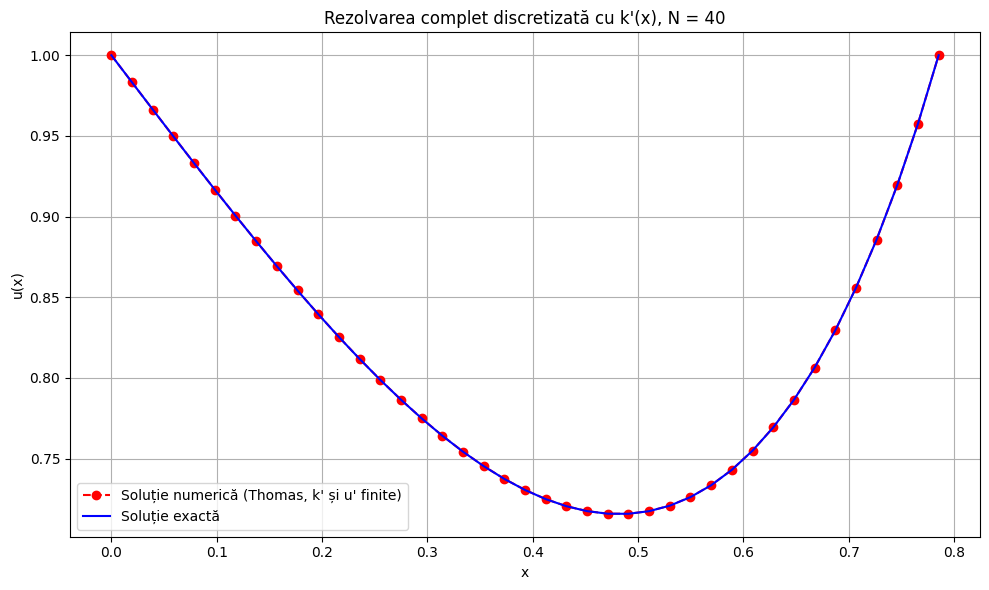

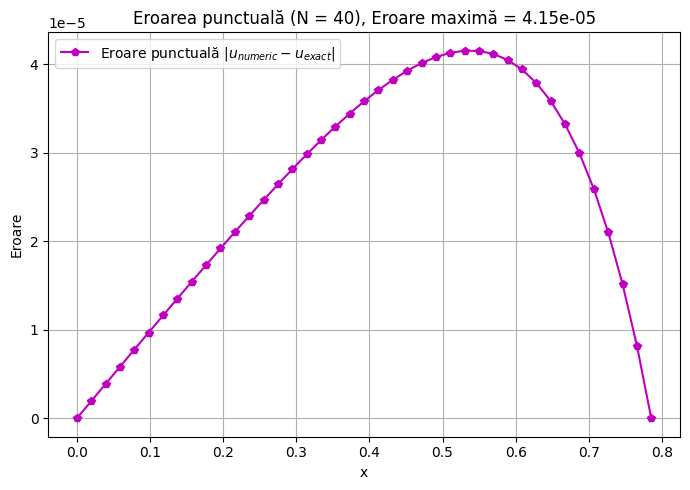

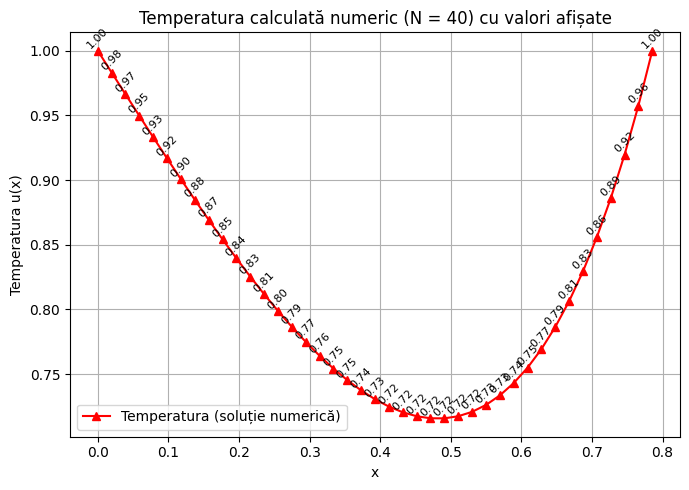

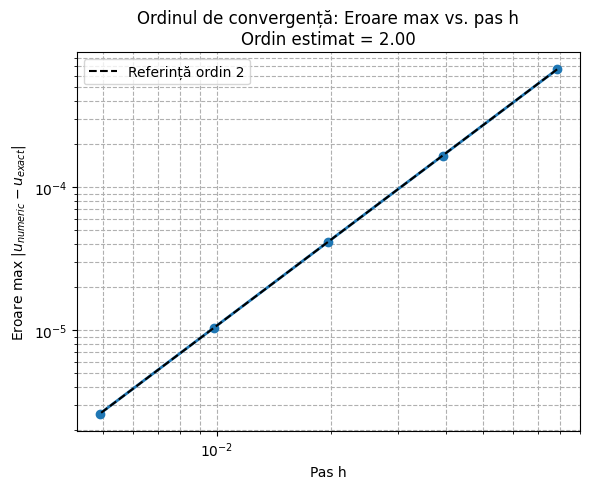

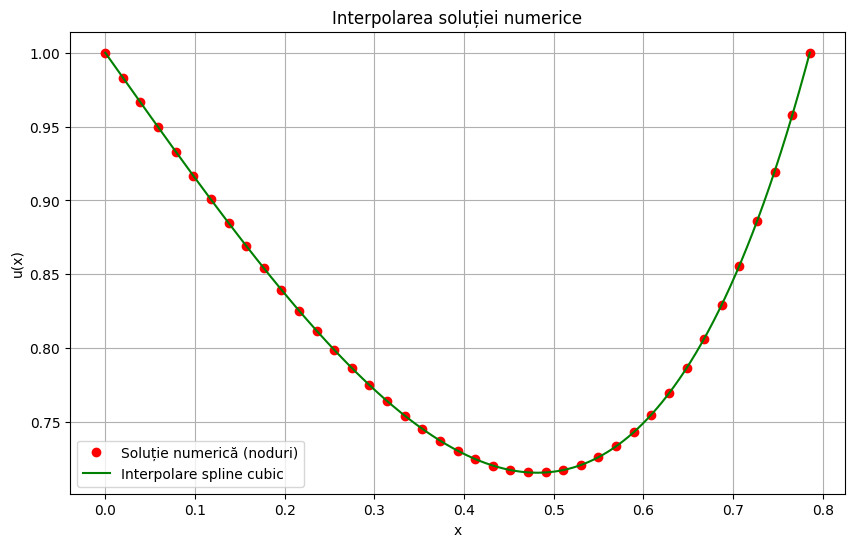

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#parametri
L = np.pi/4
A = 1.0  # u(0) = A
B = 1.0  # u(L) = B

# parametri baza
N = 40  #putem modifica
h = L / N
x = np.linspace(0, L, N+1)

#definim k(x)
def k(x):
    return np.cos(x)**2

#definim f(x) 
def f(x):
    return -4*np.sin(2*x)

#soluție exactă
u_exact_func = lambda x: -4*x + np.pi*np.tan(x) + 1

#calcul k(x)
k_valori = k(x)

#calcul k'(x) 
k_prim = np.zeros(N+1)
for i in range(1, N):
    k_prim[i] = (k_valori[i+1] - k_valori[i-1]) / (2*h)

#inițializare sistem
a = np.zeros(N-2)
b = np.zeros(N-1)
c = np.zeros(N-2)
d = np.zeros(N-1)

#construim sistemul
for i in range(1, N):
    idx = i - 1
    
    u_prim_coef_left  = -1 / (2*h)
    u_prim_coef_right =  1 / (2*h)
    u_prim_secund_coef_left  =  1 / h**2
    u_prim_secund_coef_center = -2 / h**2
    u_prim_secund_coef_right =  1 / h**2
    
    a_kprime_uprime = - k_prim[i] * u_prim_coef_left
    b_kprime_uprime = 0
    c_kprime_uprime = - k_prim[i] * u_prim_coef_right
    
    a_kuprimeprime = - k_valori[i] * u_prim_secund_coef_left
    b_kuprimeprime = - k_valori[i] * u_prim_secund_coef_center
    c_kuprimeprime = - k_valori[i] * u_prim_secund_coef_right
    
    if idx > 0:
        a[idx-1] = a_kprime_uprime + a_kuprimeprime
    b[idx] = b_kprime_uprime + b_kuprimeprime
    if idx < N-2:
        c[idx] = c_kprime_uprime + c_kuprimeprime
    
    d[idx] = f(x[i])

#Dirichlet
d[0] -= ( (- k_prim[1] * (-1/(2*h)) ) + (- k_valori[1] * (1/h**2)) ) * A
d[-1] -= ( (- k_prim[N-1] * (1/(2*h)) ) + (- k_valori[N-1] * (1/h**2)) ) * B

#Thomas
def thomas(a, b, c, d):
    n = len(d)
    for i in range(1, n):
        w = a[i-1] / b[i-1]
        b[i] -= w * c[i-1]
        d[i] -= w * d[i-1]
    u = np.zeros(n)
    u[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        u[i] = (d[i] - c[i] * u[i+1]) / b[i]
    return u

#rezolvare
U_interior = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# soluție completă 
U = np.zeros(N+1)
U[0] = A
U[1:N] = U_interior
U[N] = B

#soluție exactă
u_exact = u_exact_func(x)

#eroare
error = np.abs(U - u_exact)
error_max = np.max(error)

#GRAFICE

#discretizarea domeniului
plt.figure(figsize=(10, 2))
plt.stem(x, np.ones_like(x), linefmt='b-', markerfmt='bo', basefmt=" ")
plt.title(f"Discretizarea domeniului cu N = {N} noduri")
plt.xlabel("x")
plt.legend(["Noduri de discretizare"])
plt.grid(True)
plt.tight_layout()

#plot
plt.figure(figsize=(10, 6))
plt.plot(x, U, 'o--', label='Soluție numerică (Thomas, k\' și u\' finite)', color='red')

#comparăm cu soluția exactă
u_exact = u_exact_func(x)
plt.plot(x, u_exact, '-', label='Soluție exactă', color='blue')

plt.title(f"Rezolvarea complet discretizată cu k'(x), N = {N}")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#eroare punctuală
plt.figure(figsize=(7,5))
plt.plot(x, error, 'mp-', label=r"Eroare punctuală $|u_{numeric} - u_{exact}|$")
plt.title(f"Eroarea punctuală (N = {N}), Eroare maximă = {error_max:.2e}")
plt.xlabel('x')
plt.ylabel('Eroare')
plt.legend()
plt.grid(True)
plt.tight_layout()

#temperatura numerică cu valori afișate
plt.figure(figsize=(7,5))
plt.plot(x, U, 'r^-', label='Temperatura (soluție numerică)')
for i in range(len(x)):
    plt.text(x[i], U[i], f"{U[i]:.2f}", fontsize=8, ha='center', va='bottom', rotation=45)
plt.title(f"Temperatura calculată numeric (N = {N}) cu valori afișate")
plt.xlabel('x')
plt.ylabel('Temperatura u(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()

#ordinul de convergență (error vs h)
N_values = [10, 20, 40, 80, 160]
h_values = []
error_values = []

for N_test in N_values:
    h_test = L / N_test
    x_test = np.linspace(0, L, N_test+1)
    k_values_test = k(x_test)
    
    # k'(x)
    k_prime_test = np.zeros(N_test+1)
    for i in range(1, N_test):
        k_prime_test[i] = (k_values_test[i+1] - k_values_test[i-1]) / (2*h_test)
    
    # Sistem
    a = np.zeros(N_test-2)
    b = np.zeros(N_test-1)
    c = np.zeros(N_test-2)
    d = np.zeros(N_test-1)
    
    for i in range(1, N_test):
        idx = i - 1
        u_prime_coeff_left  = -1 / (2*h_test)
        u_prime_coeff_right =  1 / (2*h_test)
        u_double_prime_coeff_left  =  1 / h_test**2
        u_double_prime_coeff_center = -2 / h_test**2
        u_double_prime_coeff_right =  1 / h_test**2
        
        a_kprime_uprime = - k_prime_test[i] * u_prime_coeff_left
        b_kprime_uprime = 0
        c_kprime_uprime = - k_prime_test[i] * u_prime_coeff_right
        
        a_kuprimeprime = - k_values_test[i] * u_double_prime_coeff_left
        b_kuprimeprime = - k_values_test[i] * u_double_prime_coeff_center
        c_kuprimeprime = - k_values_test[i] * u_double_prime_coeff_right
        
        if idx > 0:
            a[idx-1] = a_kprime_uprime + a_kuprimeprime
        b[idx] = b_kprime_uprime + b_kuprimeprime
        if idx < N_test-2:
            c[idx] = c_kprime_uprime + c_kuprimeprime
        
        d[idx] = f(x_test[i])
    
    d[0] -= ( (- k_prime_test[1] * (-1/(2*h_test)) ) + (- k_values_test[1] * (1/h_test**2)) ) * A
    d[-1] -= ( (- k_prime_test[N_test-1] * (1/(2*h_test)) ) + (- k_values_test[N_test-1] * (1/h_test**2)) ) * B
    
    U_interior_test = thomas(a.copy(), b.copy(), c.copy(), d.copy())
    
    U_full_test = np.zeros(N_test+1)
    U_full_test[0] = A
    U_full_test[1:N_test] = U_interior_test
    U_full_test[N_test] = B
    
    u_exact_test = u_exact_func(x_test)
    
    error_test = np.abs(U_full_test - u_exact_test)
    error_max_test = np.max(error_test)
    
    h_values.append(h_test)
    error_values.append(error_max_test)

#plot ordin de convergență
plt.figure(figsize=(6,5))
plt.loglog(h_values, error_values, 'o-', linewidth=2)
#linie de referință ordin 2
h_ref = np.array(h_values)
error_ref = error_values[0] * (h_ref / h_ref[0])**2
plt.loglog(h_ref, error_ref, 'k--', label='Referință ordin 2')

#panta estimata
p = np.polyfit(np.log(h_values), np.log(error_values), 1)
plt.title(f"Ordinul de convergență: Eroare max vs. pas h\nOrdin estimat = {abs(p[0]):.2f}")
plt.xlabel("Pas h")
plt.ylabel(r"Eroare max $|u_{numeric} - u_{exact}|$")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()

#afișare totală
plt.show()

from scipy.interpolate import interp1d

interpolare = interp1d(x, U, kind='cubic')


x_nou = np.linspace(0, L, 1000)
u_interp = interpolare(x_nou)


plt.figure(figsize=(10,6))
plt.plot(x, U, 'ro', label='Soluție numerică (noduri)')
plt.plot(x_nou, u_interp, 'g-', label='Interpolare spline cubic')
plt.title("Interpolarea soluției numerice")
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

---

### Model 2D: Difuzia staționară pe domeniul pătrat $[0,1] \times [0,1]$

Se consideră ecuația Poisson pe domeniul pătrat $[0,1] \times [0,1]$:

$$
- \Delta u(x, y) = f(x, y), \quad (x, y) \in [0,1] \times [0,1]
$$

unde:

$$
f(x, y) = 2 \pi^2 \sin(\pi x) \sin(\pi y)
$$

**Soluția exactă** compatibilă este:

$$
u_{\text{exact}}(x, y) = \sin(\pi x) \sin(\pi y)
$$



Se cunosc următoarele date:

1. **Condiții la frontieră de tip Dirichlet:**  
    $$
    u(x, y) = 0, \quad \text{pe tot conturul domeniului}
    $$

2. **Discretizarea domeniului:**  
    Domeniul $[0,1] \times [0,1]$ este discretizat uniform în $(N+1) \times (N+1)$ noduri:  
    $x_i = i \cdot h$, $y_j = j \cdot h$, unde $h = \frac{1}{N}$.

    Numerotarea nodurilor este de tip lexicografic:

    $$
    k = i + j \cdot (N + 1)
    $$

3. **Rezolvarea numerică:**  
    Se utilizează **diferențe finite centrale** pentru aproximarea operatorului Laplace:

    $$
    -\Delta u(x_i, y_j) \approx \frac{- U_{i-1,j} - U_{i+1,j} - U_{i,j-1} - U_{i,j+1} + 4 U_{i,j}}{h^2}
    $$

    Se obține un **sistem liniar tridiagonal bloc** de forma:

    $$
    A \cdot U = b
    $$

    Sistemul este rezolvat eficient utilizând funcția `spsolve` pentru matrice sparse. Complexitate O(n^2)

---



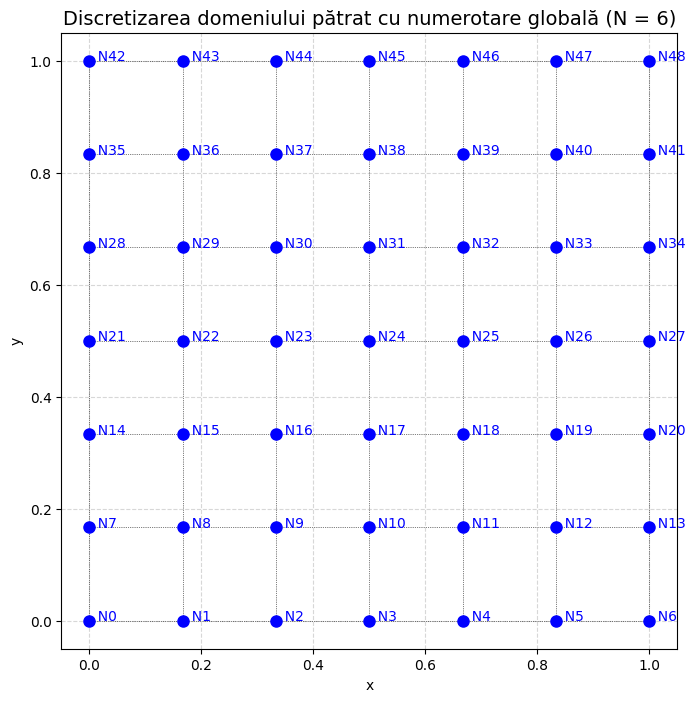

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#parametri
N = 6 
h = 1.0 / N

#generare grilă
x = np.linspace(0, 1, N + 1)
y = np.linspace(0, 1, N + 1)
X, Y = np.meshgrid(x, y, indexing='ij')

#numerotare noduri
def numerotare(i, j):
    return i + j * (N + 1)

#plotare grilă cu numerotare 
plt.figure(figsize=(8,8))
plt.plot(X, Y, 'k:', linewidth=0.5)  
plt.plot(X.T, Y.T, 'k:', linewidth=0.5)

#punctele (nodurile)
plt.plot(X.flatten(), Y.flatten(), 'bo', markersize=8)

#adaugare numerotare
for j in range(N + 1):
    for i in range(N + 1):
        k = numerotare(i, j)
        plt.text(X[i, j], Y[i, j], f'  N{ k }', color='blue', fontsize=10)

#configurare grafic
plt.title(f'Discretizarea domeniului pătrat cu numerotare globală (N = {N})', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.axis([ -0.05, 1.05, -0.05, 1.05])
plt.gca().set_aspect('equal')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Număr total de noduri: 441
Rezolv sistemul sparse...
Rezolvare completă!
Eroare maximă față de soluția exactă: 2.058707e-03


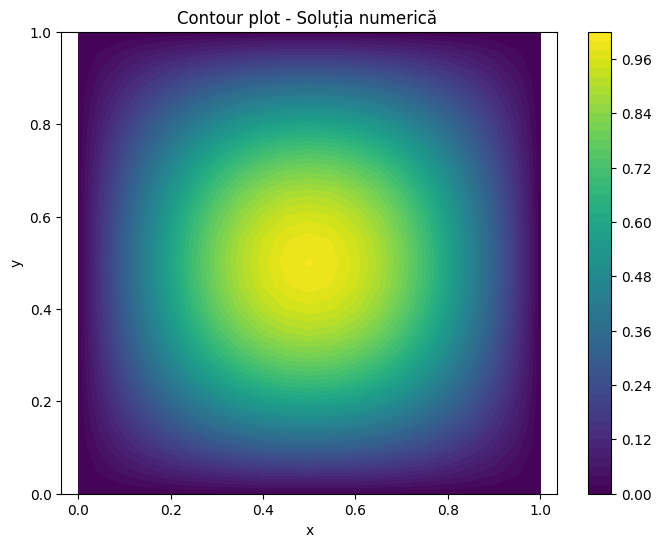

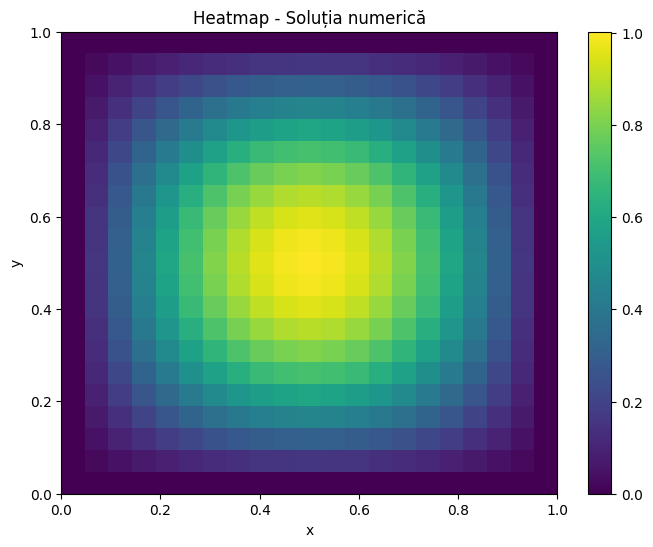

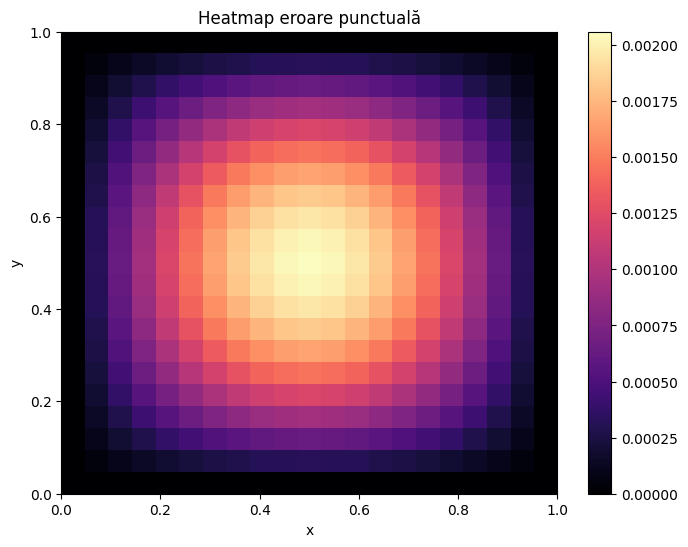

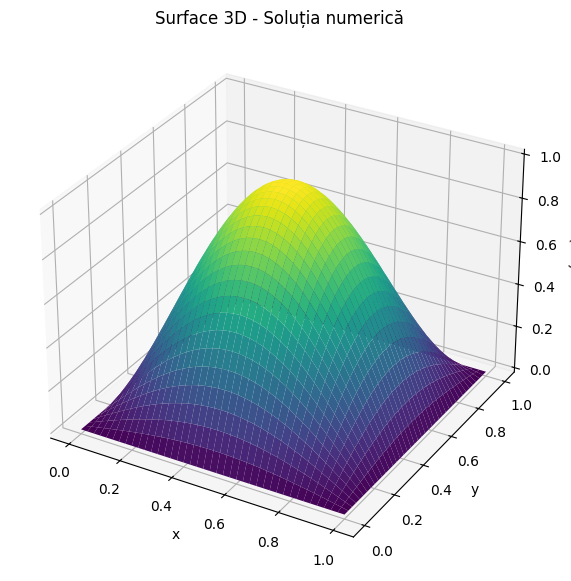

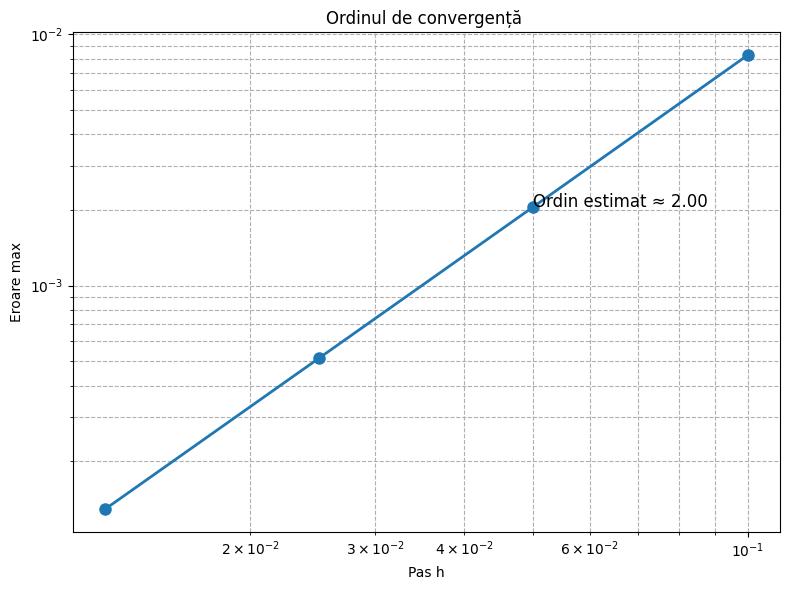

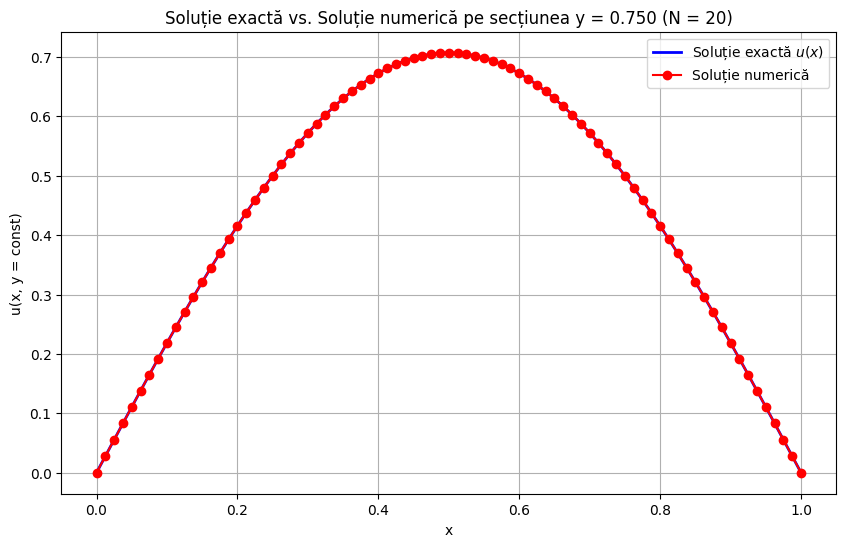

u(0.35, 0.45) interpolat = 0.8801498579963772


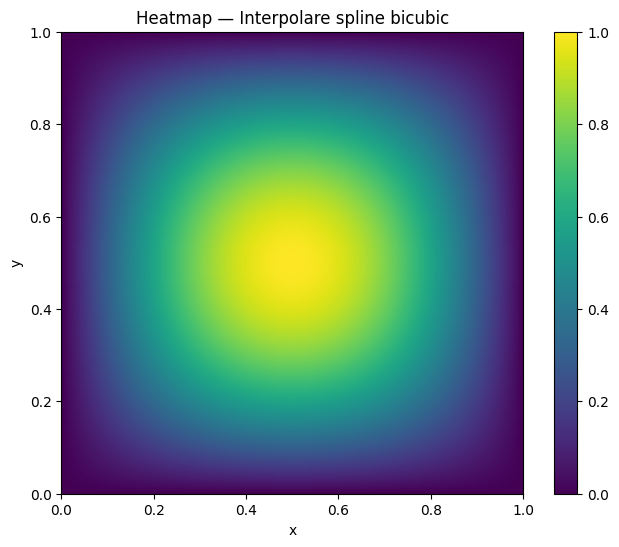

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve

#parametrii domeniului
N = 20
h = 1.0 / N
x = np.linspace(0, 1, N + 1)
y = np.linspace(0, 1, N + 1)

#numerotare : Ni + j*(N+1)
def numerotare(i, j):
    return i + j * (N + 1)

num_unknowns = (N + 1) ** 2
print(f"Număr total de noduri: {num_unknowns}")

#funcția f(x,y) compatibilă cu soluția exactă
f = lambda x, y: 2 * (np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

#construirea sistemului
A = lil_matrix((num_unknowns, num_unknowns))
b = np.zeros(num_unknowns)

for j in range(N + 1):
    for i in range(N + 1):
        k = numerotare(i, j)
        xi, yj = x[i], y[j]

        if i == 0 or i == N or j == 0 or j == N:
            #pe frontieră → condiție Dirichlet: u(x,y) = 0
            A[k, k] = 1
            b[k] = 0
        else:
            # ∂²u/∂x²
            A[k, numerotare(i - 1, j)] = -1 / h**2
            A[k, numerotare(i + 1, j)] = -1 / h**2

            # ∂²u/∂y²
            A[k, numerotare(i, j - 1)] = -1 / h**2
            A[k, numerotare(i, j + 1)] = -1 / h**2

            # u(i,j)
            A[k, k] = 4 / h**2

            b[k] = f(xi, yj)

#rezolvarea sistemului
print("Rezolv sistemul sparse...")
U_vec = spsolve(A.tocsr(), b)
print("Rezolvare completă!")

#reconstituire matrice U 
U_matrix = U_vec.reshape((N + 1, N + 1))

#soluția exactă 
X, Y = np.meshgrid(x, y, indexing='ij')
U_exact = np.sin(np.pi * X) * np.sin(np.pi * Y)

#calculul erorii 
error_matrix = np.abs(U_matrix - U_exact)
eroare_max = np.max(error_matrix)
print(f"Eroare maximă față de soluția exactă: {eroare_max:.6e}")

#GRAFICE

#contour plot 
plt.figure(figsize=(8,6))
cp = plt.contourf(X, Y, U_matrix, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour plot - Soluția numerică ')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

#heatmap soluție numerică
plt.figure(figsize=(8,6))
plt.imshow(U_matrix.T, extent=[0,1,0,1], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Heatmap - Soluția numerică')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#heatmap eroare punctuală 
plt.figure(figsize=(8,6))
plt.imshow(error_matrix.T, extent=[0,1,0,1], origin='lower', cmap='magma', aspect='auto')
plt.colorbar()
plt.title('Heatmap eroare punctuală')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#ordinul de convergență

h_values = []
error_max_values = []

#testăm pe N = 10, 20, 40, 80
N_values = [10, 20, 40, 80]

for N_test in N_values:
    h = 1.0 / N_test
    x = np.linspace(0, 1, N_test + 1)
    y = np.linspace(0, 1, N_test + 1)

    def numerotare(i,j):
        return i + j * (N_test + 1)

    num_unknowns = (N_test + 1) ** 2
    A = lil_matrix((num_unknowns, num_unknowns))
    b = np.zeros(num_unknowns)

    #f(x,y) compatibil
    f = lambda x, y: 2 * (np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

    for j in range(N_test + 1):
        for i in range(N_test + 1):
            k = numerotare(i, j)
            xi, yj = x[i], y[j]

            if i == 0 or i == N_test or j == 0 or j == N_test:
                A[k,k] = 1
                b[k] = 0
            else:
                A[k, numerotare(i - 1, j)] = -1 / h**2
                A[k, numerotare(i + 1, j)] = -1 / h**2

                A[k, numerotare(i, j - 1)] = -1 / h**2
                A[k, numerotare(i, j + 1)] = -1 / h**2

                A[k,k] = 4 / h**2

                b[k] = f(xi, yj)

    U_vec = spsolve(A.tocsr(), b)
    U_matrix = U_vec.reshape((N_test + 1, N_test + 1))

    X, Y = np.meshgrid(x, y, indexing='ij')
    U_exact = np.sin(np.pi * X) * np.sin(np.pi * Y)

    eroare_max = np.max(np.abs(U_matrix - U_exact))

    h_values.append(h)
    error_max_values.append(eroare_max)


#surface plot 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U_matrix, cmap='viridis')
ax.set_title('Surface 3D - Soluția numerică')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
plt.show()




#plot loglog pentru ordin de convergență 
plt.figure(figsize=(8,6))
plt.loglog(h_values, error_max_values, 'o-', linewidth=2, markersize=8)
plt.title("Ordinul de convergență ")
plt.xlabel("Pas h")
plt.ylabel("Eroare max")
plt.grid(True, which='both', linestyle='--')

#fit log-log pentru ordin estimat
log_h = np.log(h_values)
log_err = np.log(error_max_values)
p = np.polyfit(log_h, log_err, 1)

plt.text(h_values[1], error_max_values[1], f"Ordin estimat ≈ {abs(p[0]):.2f}", fontsize=12)

plt.tight_layout()
plt.show()

#grafic comparativ pe o secțiune y = constant 

#alegem y_const = 0.75
y_const = 0.75

#găsim cel mai apropiat j pentru y_const
j_closest = np.argmin(np.abs(y - y_const))
y_actual = y[j_closest]

#pregătim datele pentru plot
x_profile = x
U_numeric_profile = U_matrix[:, j_closest]
U_exact_profile = U_exact[:, j_closest]

#plot
plt.figure(figsize=(10,6))
plt.plot(x_profile, U_exact_profile, 'b-', linewidth=2, label='Soluție exactă $u(x)$')
plt.plot(x_profile, U_numeric_profile, 'ro-', linewidth=1.5, markersize=6, label='Soluție numerică')

plt.title(f"Soluție exactă vs. Soluție numerică pe secțiunea y = {y_actual:.3f} (N = {N})")
plt.xlabel("x")
plt.ylabel("u(x, y = const)")
plt.legend()
plt.grid(True)
plt.show()

from scipy.interpolate import RectBivariateSpline

#construim spline-ul
interp_func = RectBivariateSpline(x, y, U_matrix)

#exemplu: evaluăm într-un punct
u_interp = interp_func(0.35, 0.45)[0, 0]
print(f"u(0.35, 0.45) interpolat = {u_interp}")

#grid fin pentru vizualizare
x_fine = np.linspace(0, 1, 200)
y_fine = np.linspace(0, 1, 200)
U_interp_fine = interp_func(x_fine, y_fine)

#heatmap spline bicubic
plt.figure(figsize=(8,6))
plt.imshow(U_interp_fine.T, extent=[0,1,0,1], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Heatmap — Interpolare spline bicubic')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




---
### Model 2D: Difuzia staționară pe domeniu în formă de L

Se consideră ecuația Poisson pe un domeniu **neregulat** în formă de L (obținut prin decuparea unui colț din pătratul $[0,1] \times [0,1]$):

$$
- \Delta u(x, y) = f(x, y), \quad (x, y) \in Ω
$$

unde:

$$
f(x, y) = 2 \pi^2 \sin(\pi x) \sin(\pi y)
$$

**Soluția exactă** este cunoscută:

$$
u_{\text{exact}}(x, y) = \sin(\pi x) \left[ c_1 \left( e^{\pi y} - e^{-\pi y} \right) + \frac{y}{\pi^2} \right]
$$

cu:

$$
c_1 = -\frac{0.5}{\pi^2 \left( e^{\pi/2} - e^{-\pi/2} \right)}
$$



Se cunosc următoarele date:

1. **Geometria domeniului:**  
    Domeniul de calcul este un pătrat $[0,1] \times [0,1]$ din care se elimină un colț, rezultând un domeniu în formă de **L**.  
    Colțul eliminat este controlat prin parametrul `optiune`, cu valori posibile:  
    - `'dreapta-sus'`  
    - `'dreapta-jos'`  
    - `'stanga-sus'`  
    - `'stanga-jos'`

2. **Condiții la frontieră de tip Dirichlet:**  
    $$
    u(x, y) = 0, \quad \text{pe tot conturul domeniului Ω}
    $$

3. **Discretizarea domeniului:**  
    Domeniul $[0,1] \times [0,1]$ este discretizat uniform în $(N+1) \times (N+1)$ noduri:  
    $x_i = i \cdot h$, $y_j = j \cdot h$, unde $h = \frac{1}{N}$.

    → Se construiește o **mască booleană** pentru identificarea punctelor active (în interiorul domeniului Ω).

    → Numerotarea punctelor active este:

    $$
    k = \text{index\_map}(i, j)
    $$

---

Număr de puncte active (num_unknowns): 85


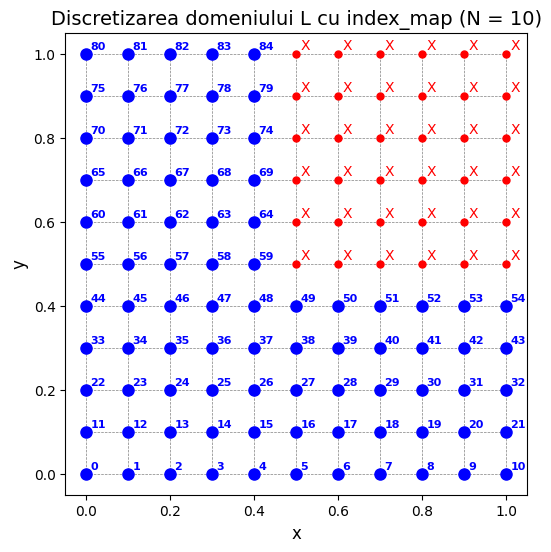

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#parametri
N = 10  
h = 1.0 / N

#generăm grila
x = np.linspace(0, 1, N+1)
y = np.linspace(0, 1, N+1)

#construim masca
mask = np.ones((N+1, N+1), dtype=bool)

for i in range(N+1):
    for j in range(N+1):
        xi = x[i]
        yj = y[j]
        if xi >= 0.5 and yj >= 0.5:
                mask[i,j] = False

#construim index_map (numerotare pentru sistem Ax=b)
index_map = -np.ones((N+1, N+1), dtype=int)
counter = 0
for j in range(N+1):
    for i in range(N+1):
        if mask[i,j]:
            index_map[i,j] = counter
            counter += 1

num_unknowns = counter
print(f"Număr de puncte active (num_unknowns): {num_unknowns}")

#plot
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')

#plotăm liniile grilei
for xi in x:
    ax.plot([xi, xi], [0, 1], color='gray', linestyle='--', linewidth=0.5)
for yj in y:
    ax.plot([0, 1], [yj, yj], color='gray', linestyle='--', linewidth=0.5)

#plotăm nodurile cu index_map
for j in range(N+1):
    for i in range(N+1):
        xi = x[i]
        yj = y[j]
        
        if mask[i,j]:
            ax.plot(xi, yj, 'bo', markersize=8)  # punct activ
            ax.text(xi + 0.01, yj + 0.01, f'{index_map[i,j]}', fontsize=8, color='blue', fontweight='bold')
        else:
            ax.plot(xi, yj, 'ro', markersize=5)  # punct inactiv
            ax.text(xi + 0.01, yj + 0.01, 'X', fontsize=10, color='red',)

#setări plot
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title(f'Discretizarea domeniului L cu index_map (N = {N})', fontsize=14)
plt.grid(False)
plt.show()


Număr puncte active în L: 1925
Rezolv sistemul sparse...
Rezolvare completă!
Eroare maximă față de soluția exactă: 1.526100e-01


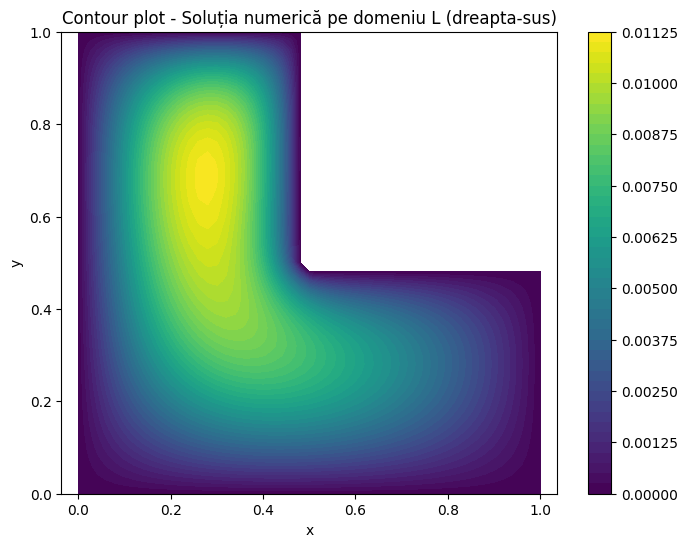

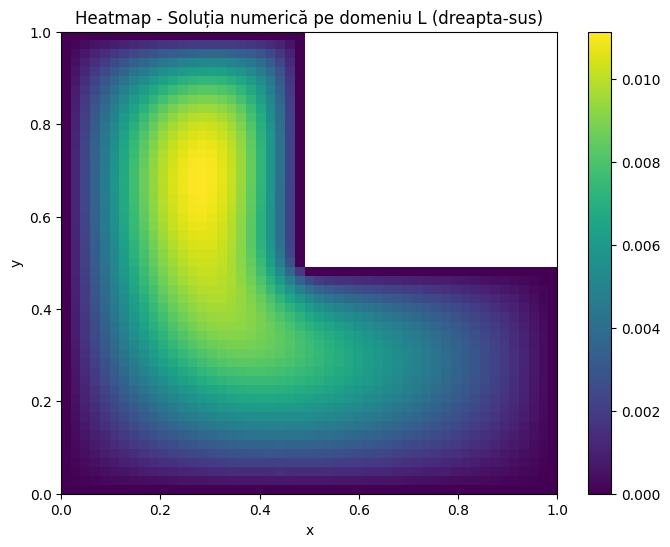

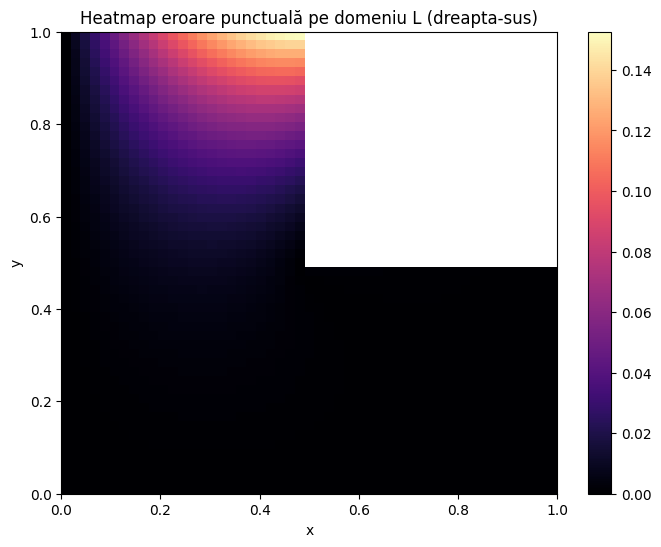

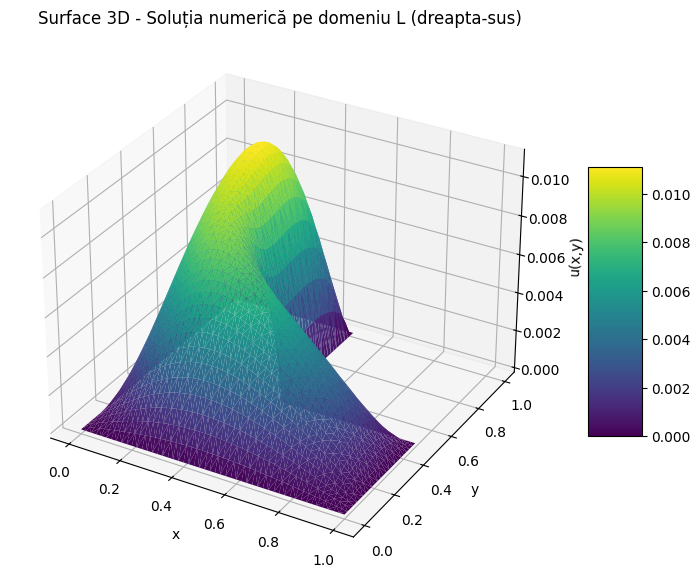

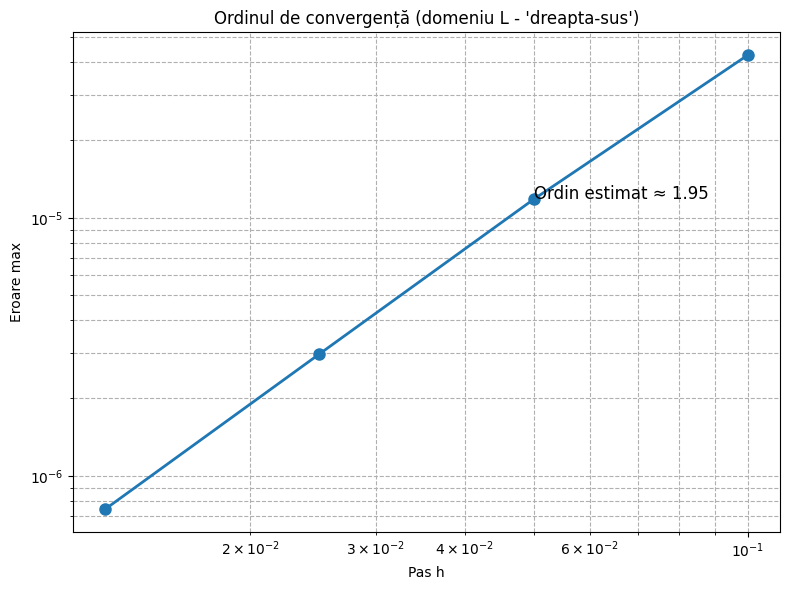

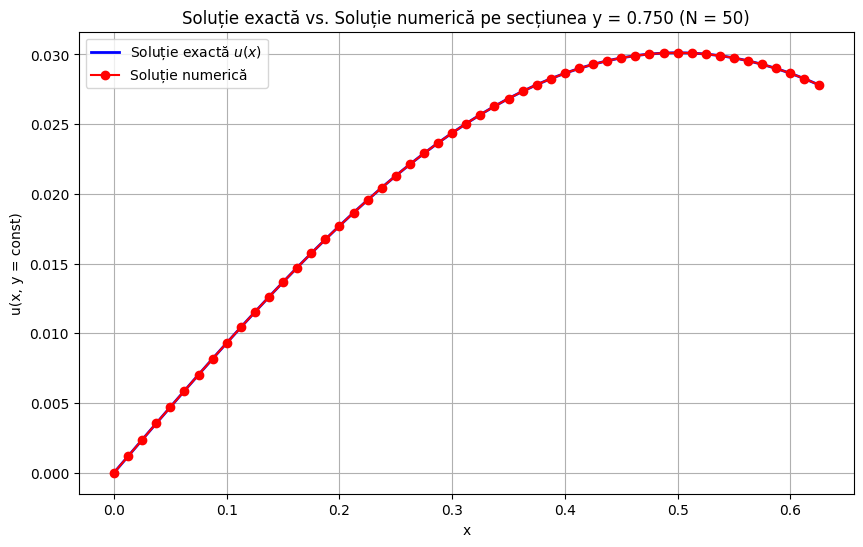

u(0.35, 0.45) interpolat = 0.025507086228662962


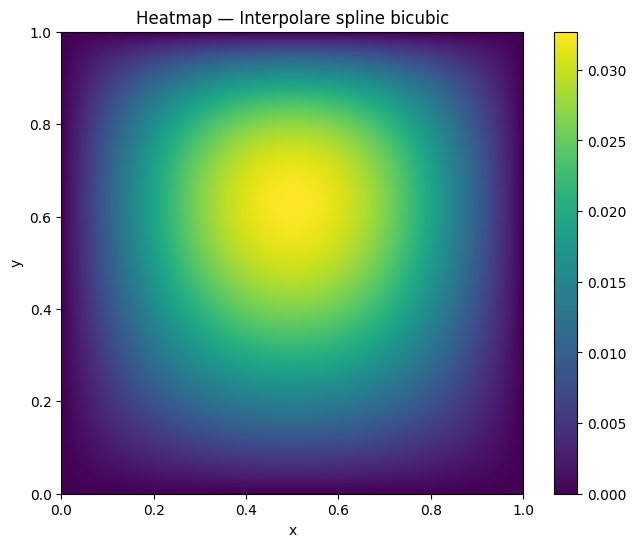

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

#parametrii domeniului 
N = 50         #grilă NxN
h = 1.0 / N      #pasul de discretizare

x = np.linspace(0, 1, N + 1)
y = np.linspace(0, 1, N + 1)

#selector poziție decupaj L 
optiune = 'dreapta-sus'  #alegem colțul decupat

#definire mască pentru forma L 
mask = np.ones((N + 1, N + 1), dtype=bool)

for j in range(N + 1):
    for i in range(N + 1):
        xi, yj = x[i], y[j]
        
        if optiune == 'dreapta-sus':
            if xi >= 0.5 and yj >= 0.5:
                mask[i,j] = False
        elif optiune == 'dreapta-jos':
            if xi >= 0.5 and yj <= 0.5:
                mask[i,j] = False
        elif optiune == 'stanga-sus':
            if xi <= 0.5 and yj >= 0.5:
                mask[i,j] = False
        elif optiune == 'stanga-jos':
            if xi <= 0.5 and yj <= 0.5:
                mask[i,j] = False

#numerotare: punct activ → index linie 
index_map = -np.ones((N + 1, N + 1), dtype=int)
counter = 0
for j in range(N + 1):
    for i in range(N + 1):
        if mask[i,j]:
            index_map[i,j] = counter
            counter += 1

num_unknowns = counter
print(f"Număr puncte active în L: {num_unknowns}")

#sistemul Ax = b 
A = lil_matrix((num_unknowns, num_unknowns))
b = np.zeros(num_unknowns)

#funcția f(x,y) 
f = lambda x, y: np.sin(np.pi * x) * y

#construirea sistemului 
for j in range(N + 1):
    for i in range(N + 1):
        if not mask[i,j]:
            continue  #punct inactiv (în afara domeniului L)

        k = index_map[i,j]
        xi, yj = x[i], y[j]

        #verificăm dacă e margine
        is_boundary = False
        neighbors = []

        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni = i + di
            nj = j + dj
            if ni < 0 or ni > N or nj < 0 or nj > N or not mask[ni,nj]:
                is_boundary = True
            else:
                neighbors.append(index_map[ni,nj])

        if is_boundary:
            #condiție Dirichlet u=0
            A[k,k] = 1
            b[k] = 0
        else:
            #punct interior: 
            A[k,k] = 4 / h**2
            for neighbor in neighbors:
                A[k,neighbor] = -1 / h**2
            b[k] = f(xi, yj)

#rezolvarea sistemului 
print("Rezolv sistemul sparse...")
U_vec = spsolve(A.tocsr(), b)
print("Rezolvare completă!")

#reconstituire matrice U 
U_matrix = np.zeros((N + 1, N + 1))
for j in range(N + 1):
    for i in range(N + 1):
        if mask[i,j]:
            k = index_map[i,j]
            U_matrix[i,j] = U_vec[k]
        else:
            U_matrix[i,j] = np.nan  #punct inactiv

#Soluția exactă
c1 = -0.5 / (np.pi**2 * (np.exp(np.pi / 2) - np.exp(-np.pi / 2)))

#grila X, Y
X, Y = np.meshgrid(x, y, indexing='ij')

#soluția exactă u(x,y)
U_exact = np.sin(np.pi * X) * ( c1 * (np.exp(np.pi * Y) - np.exp(-np.pi * Y)) + Y / (np.pi**2) )


#calculul erorii
error_matrix = np.abs(U_matrix - U_exact)
eroare_max = np.nanmax(error_matrix)
print(f"Eroare maximă față de soluția exactă: {eroare_max:.6e}")

#GRAFICE

#contour plot 
plt.figure(figsize=(8,6))
cp = plt.contourf(X, Y, U_matrix, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title(f'Contour plot - Soluția numerică pe domeniu L ({optiune})')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

#heatmap soluție numerică
plt.figure(figsize=(8,6))
plt.imshow(U_matrix.T, extent=[0,1,0,1], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar()
plt.title(f'Heatmap - Soluția numerică pe domeniu L ({optiune})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#heatmap eroare punctuală 
plt.figure(figsize=(8,6))
plt.imshow(error_matrix.T, extent=[0,1,0,1], origin='lower', cmap='magma', aspect='auto')
plt.colorbar()
plt.title(f'Heatmap eroare punctuală pe domeniu L ({optiune})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#surface plot 3D 
X_points = []
Y_points = []
U_points = []

for j in range(N + 1):
    for i in range(N + 1):
        if mask[i,j]:
            X_points.append(x[i])
            Y_points.append(y[j])
            k = index_map[i,j]
            U_points.append(U_vec[k])

X_points = np.array(X_points)
Y_points = np.array(Y_points)
U_points = np.array(U_points)

tri = mtri.Triangulation(X_points, Y_points)
triangles = tri.triangles
X_tri = X_points[triangles]
Y_tri = Y_points[triangles]

max_edge_length = np.max([
    np.sqrt((X_tri[:,0] - X_tri[:,1])**2 + (Y_tri[:,0] - Y_tri[:,1])**2),
    np.sqrt((X_tri[:,1] - X_tri[:,2])**2 + (Y_tri[:,1] - Y_tri[:,2])**2),
    np.sqrt((X_tri[:,2] - X_tri[:,0])**2 + (Y_tri[:,2] - Y_tri[:,0])**2)
], axis=0)

mask_tri = max_edge_length < (1.5 * h)
tri.set_mask(~mask_tri)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
trisurf = ax.plot_trisurf(tri, U_points, cmap='viridis', linewidth=0.2, antialiased=True)

fig.colorbar(trisurf, shrink=0.5, aspect=5)
ax.set_title(f'Surface 3D - Soluția numerică pe domeniu L ({optiune})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
plt.show()

#ordinul de convergență
h_values = []
error_max_values = []
N_values = [10, 20, 40, 80]

for N_test in N_values:
    h = 1.0 / N_test
    x = np.linspace(0, 1, N_test + 1)
    y = np.linspace(0, 1, N_test + 1)

    mask = np.ones((N_test + 1, N_test + 1), dtype=bool)
    for j in range(N_test + 1):
        for i in range(N_test + 1):
            xi, yj = x[i], y[j]
            if optiune == 'dreapta-jos':
                if xi >= 0.5 and yj <= 0.5:
                    mask[i,j] = False

    index_map = -np.ones((N_test + 1, N_test + 1), dtype=int)
    counter = 0
    for j in range(N_test + 1):
        for i in range(N_test + 1):
            if mask[i,j]:
                index_map[i,j] = counter
                counter += 1

    A = lil_matrix((counter, counter))
    b = np.zeros(counter)

    f = lambda x, y: np.sin(np.pi * x) * y

    for j in range(N_test + 1):
        for i in range(N_test + 1):
            if not mask[i,j]:
                continue
            k = index_map[i,j]
            xi, yj = x[i], y[j]
            is_boundary = False
            neighbors = []
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni = i + di
                nj = j + dj
                if ni < 0 or ni > N_test or nj < 0 or nj > N_test or not mask[ni,nj]:
                    is_boundary = True
                else:
                    neighbors.append(index_map[ni,nj])
            if is_boundary:
                A[k,k] = 1
                b[k] = 0
            else:
                A[k,k] = 4 / h**2
                for neighbor in neighbors:
                    A[k,neighbor] = -1 / h**2
                b[k] = f(xi, yj)

    U_vec = spsolve(A.tocsr(), b)

    U_matrix = np.zeros((N_test + 1, N_test + 1))
    for j in range(N_test + 1):
        for i in range(N_test + 1):
            if mask[i,j]:
                k = index_map[i,j]
                U_matrix[i,j] = U_vec[k]
            else:
                U_matrix[i,j] = np.nan

    C1 = - 1 / (np.pi**2 * (np.exp(np.pi) - np.exp(-np.pi)))
    X, Y = np.meshgrid(x, y, indexing='ij')
    U_exact = np.sin(np.pi * X) * ( C1 * (np.exp(np.pi * Y) - np.exp(-np.pi * Y)) + Y / (np.pi**2) )

    eroare_max = np.nanmax(np.abs(U_matrix - U_exact))

    h_values.append(h)
    error_max_values.append(eroare_max)

plt.figure(figsize=(8,6))
plt.loglog(h_values, error_max_values, 'o-', linewidth=2, markersize=8)
plt.title(f"Ordinul de convergență (domeniu L - '{optiune}')")
plt.xlabel("Pas h")
plt.ylabel("Eroare max")
plt.grid(True, which='both', linestyle='--')

log_h = np.log(h_values)
log_err = np.log(error_max_values)
p = np.polyfit(log_h, log_err, 1)
plt.text(h_values[1], error_max_values[1], f"Ordin estimat ≈ {abs(p[0]):.2f}", fontsize=12)

plt.tight_layout()
plt.show()


#grafic comparativ pe o secțiune y = constant 

#alegem o valoare de y pentru secțiune
y_const = 0.75

#găsim indicele j corespunzător lui y_const
j_closest = np.argmin(np.abs(y - y_const))
y_actual = y[j_closest]  #valoarea reală de y

#pregătim datele pentru plot
x_active = []
U_numeric_profile = []
U_exact_profile = []

for i in range(N + 1):
    xi = x[i]
    if mask[i, j_closest]:
        x_active.append(xi)
        U_numeric_profile.append(U_matrix[i, j_closest])
        U_exact_profile.append(U_exact[i, j_closest])

#plot
plt.figure(figsize=(10,6))
plt.plot(x_active, U_exact_profile, 'b-', linewidth=2, label='Soluție exactă $u(x)$')
plt.plot(x_active, U_numeric_profile, 'ro-', linewidth=1.5, markersize=6, label='Soluție numerică')

plt.title(f"Soluție exactă vs. Soluție numerică pe secțiunea y = {y_actual:.3f} (N = {N})")
plt.xlabel("x")
plt.ylabel("u(x, y = const)")
plt.legend()
plt.grid(True)
plt.show()



from scipy.interpolate import RectBivariateSpline

#construim spline-ul
interp_func = RectBivariateSpline(x, y, U_matrix)

#exemplu: evaluăm într-un punct
u_interp = interp_func(0.35, 0.45)[0, 0]
print(f"u(0.35, 0.45) interpolat = {u_interp}")

#grid fin pentru vizualizare
x_fine = np.linspace(0, 1, 200)
y_fine = np.linspace(0, 1, 200)
U_interp_fine = interp_func(x_fine, y_fine)

#heatmap spline bicubic
plt.figure(figsize=(8,6))
plt.imshow(U_interp_fine.T, extent=[0,1,0,1], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Heatmap — Interpolare spline bicubic')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




---

<div align="center" style="color:pink; font-size:32px; font-family:Comic Sans MS, cursive;">
    Sfârșit!
</div>

---